<a href="https://colab.research.google.com/github/rosacarla/treinamento-triplo-de-RNC/blob/main/Treinamento_RNC_S22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> # TREINAMENTO TRIPLO DE REDE NEURAL COMPETITIVA - RNC  
> CURSO: TECNOLOGIA EM INTELIGÊNCIA ARTIFICIAL APLICADA  
> DISCIPLINA: REDES NEURAIS   
> PROFESSOR: LUCAS EMANUEL SILVA E OLIVEIRA  
> ESTUDANTE: CARLA EDILA SILVEIRA  
> <p align='justify'>OBJETIVO: treinar redes RNC para agrupamento de elementos de uma base de dados (base_veiculos_S8.csv) e previsões do desempenho de veículos automotores, considerando a relação entre três duplas de variáveis (cilindrada (L) x eficiência (Km/L), cilindrada (L) x emissão de CO2 (g/Km), eficiência (km/L) x emissão de CO2 (g/Km)).<p/>  
> DATA: 20/09/2023</br>
> </br>
<img src='https://i.postimg.cc/zBf0xKgJ/rn.png' width=980 height=256>


In [ ]:
# IMPORTAÇÃO DE BIBLIOTECAS

import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [ ]:
# CRIAÇÃO DA CLASSE PARA REDE NEURAL COMPETITIVA (RNC)

class RNC:
    def __init__(self, input_shape, num_neurons):
        self.input_shape = input_shape
        self.num_neurons = num_neurons
        self.weights = np.random.rand(num_neurons, input_shape)

    def train(self, input_data, learning_rate=0.1, num_epochs=5):
        progress_bar = tqdm(total=num_epochs, desc='Treinando', unit=' épocas', ncols=80)
        for epoch in range(num_epochs):
            for input_sample in input_data:
                winner_neuron = self.get_winner_neuron(input_sample)
                self.update_weights(input_sample, winner_neuron, learning_rate)
            progress_bar.set_postfix(epoch=epoch+1)
            progress_bar.update()
        progress_bar.close()

    def get_winner_neuron(self, input_sample):
        distances = np.linalg.norm(input_sample - self.weights, axis=1)
        return np.argmin(distances)

    def update_weights(self, input_sample, winner_neuron, learning_rate):
        self.weights[winner_neuron] += learning_rate * (input_sample - self.weights[winner_neuron])

    def predict(self, input_data):
        predictions = []
        for input_sample in input_data:
            winner_neuron = self.get_winner_neuron(input_sample)
            predictions.append(winner_neuron)
        return predictions

In [ ]:
# MONTAGEM DO DRIVE PARA CARREGAR DADOS

from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
# CARREGAMENTO DO CONJUNTO DE DADOS
# Caminho do arquivo CSV no desktop: 'C:/RN/base_veiculos_S8.csv'

# Carrega conjunto de dados "base_veiculos_S8.csv"
data = pd.read_csv('/content/gdrive/MyDrive/RN/base_veiculos_S8.csv')

# Exibe registros do dataset
data

,Make,Model,Cilindrada,Eficiencia,CO2
0,Alfa Romeo,GT V6 2.5,2.5,8.502880,276.106975
1,Alfa Romeo,GT V6 2.5,2.5,8.502880,276.106975
2,Alfa Romeo,Spider Veloce 2000,2.0,8.928024,262.959024
3,Alfa Romeo,Spider Veloce 2000,2.0,8.928024,262.959024
4,AM General,DJ Po Vehicle 2WD,2.5,7.227448,324.831736
...,...,...,...,...,...
37962,Volvo,XC60 FWD,2.0,11.053744,216.237712
37963,Volvo,XC90 AWD,2.0,9.353168,247.927722
37964,Volvo,XC90 AWD,2.0,9.778312,238.607131
37965,Volvo,XC90 AWD PHEV,2.0,10.628600,147.886711


In [ ]:
# CONFIGURACAO DA BASE DE DADOS

# Extrai colunas de interesse
columns = ['Cilindrada', 'Eficiencia', 'CO2']
data = data[columns]

# Remove linhas com valores em branco ou zero
data = data.dropna()
data = data[(data != 0).all(axis=1)]

# Converte colunas em arrays numpy
cilindrada = data['Cilindrada'].values
eficiencia = data['Eficiencia'].values
co2 = data['CO2'].values


# Concatenação de dados combinados em um único array

# Cilindrada x Eficiencia
combinacao1 = np.column_stack((cilindrada, eficiencia))
inshape1 = combinacao1.shape[1]

# Cilindrada x CO2
combinacao2 = np.column_stack((cilindrada, co2))
inshape2 = combinacao2.shape[1]

# Eficiencia x CO2
combinacao3 = np.column_stack((eficiencia, co2))
inshape3 = combinacao2.shape[1]

In [ ]:
# Exibe 5 ultimos registros do dataset configurado

data.tail()

,Cilindrada,Eficiencia,CO2
37962,2.0,11.053744,216.237712
37963,2.0,9.353168,247.927722
37964,2.0,9.778312,238.607131
37965,2.0,10.628600,147.886711
37966,2.0,10.203456,231.772031


In [ ]:
# CONFIGURAÇÃO DA ESTRUTURA DA REDE NEURAL COMPETITIVA

# DEFINE QUANTIDADE DE NEURÔNIOS DAS REDES
num_neur_rnc1 = 3
num_neur_rnc2 = 4
num_neur_rnc3 = 4

# DEFINA O NÚMERO DE ÉPOCAS PARA TREINAMENTO DAS REDES
epocas_rnc1 = 20
epocas_rnc2 = 2
epocas_rnc3 = 2

# DEFINE TAXA DE APRENDIZADO DAS REDES
taxa_aprend_rnc1 = 0.005
taxa_aprend_rnc2 = 1.00
taxa_aprend_rnc3 = 0.50


# CONFIGURACAO DA ORDEM DE CADA POLINOMIO PARA REGRESSAO LINEAR

# Ordem do Polinomio para Regressao Cilindrada X Eficiencia
ordem_pol1 = 2

# Ordem do Polinomio para Regressao Cilindrada X CO2
ordem_pol2 = 12

# Ordem do Polinomio para Regressao Eficiencia X CO2
ordem_pol3 = 8


# INFORMAÇÃO DE PARÂMETROS PARA PREVISÃO

# Informa um valor de Cilindrada (em L) para prever a Eficiencia (em Km/L)
cilindrada1_info = 1.8

# Informa um valor de Cilindrada (em L) para prever a Emissao de CO2 (em g/Km)
cilindrada2_info = 8.2

# Informe um valor de Eficiência (em Km/L) para prever a Emissão de CO2 (em g/Km)
eficiencia_info = 15.0

In [ ]:
# CRIAÇÃO DA REDE NEURAL COMPETITIVA

# Criacao da Rede Neural Competitiva 1
rnc1 = RNC(input_shape=inshape1, num_neurons=num_neur_rnc1)

# Criacao da Rede Neural Competitiva 2
rnc2 = RNC(input_shape=inshape2, num_neurons=num_neur_rnc2)

# Criação da Rede Neural Competitiva 3
rnc3 = RNC(input_shape=inshape3, num_neurons=num_neur_rnc3)

In [ ]:
# TREINAMENTO DA REDE NEURAL COMPETITIVA

# Treinamento da Rede Neural Competitiva 1
rnc1.train(combinacao1, learning_rate=taxa_aprend_rnc1, num_epochs=epocas_rnc1)

# Treinamento da Rede Neural Competitiva 2
rnc2.train(combinacao2, learning_rate=taxa_aprend_rnc2, num_epochs=epocas_rnc2)

# Treinamento da Rede Neural Competitiva 3
rnc3.train(combinacao3, learning_rate=taxa_aprend_rnc3, num_epochs=epocas_rnc3)

Treinando: 100%|████████████████████| 2/2 [00:01<00:00,  1.03 épocas/s, epoch=2]


In [ ]:
# PREDIÇÕES DA REDE NEURAL COMPETITIVA

# Realizar a predição cilindrada x kmpl
predictions1 = rnc1.predict(combinacao1)

# Realizar a predição cilindrada x co2
predictions2 = rnc2.predict(combinacao2)

# Realizar a predição kmpl x co2
predictions3 = rnc3.predict(combinacao3)

In [ ]:
# CALCULAR OS POLINOMIOS DAS REGRESSOES

# Calculo do polinomio para Cilindrada X Eficiencia
coefficients1 = np.polyfit(cilindrada, eficiencia, ordem_pol1)
polynomial1 = np.poly1d(coefficients1)

# Calculo do polinomio para Cilindrada X Emissao de CO2
coefficients2 = np.polyfit(cilindrada, co2, ordem_pol2)
polynomial2 = np.poly1d(coefficients2)

# Calculo do polinomio para Eficiencia X Emissao de CO2
coefficients3 = np.polyfit(eficiencia, co2, ordem_pol3)
polynomial3 = np.poly1d(coefficients3)

In [ ]:
# GERAR TABELAS DE AGRUPAMENTOS (CLUSTERS)

# TABELA Cilindrada vs. Eficiencia

table_data1 = {'Cil.': cilindrada,
              'Efic.': eficiencia,
              'Group': predictions1}

df_table1 = pd.DataFrame(table_data1)

grouped_table1 = df_table1.groupby('Group').agg({'Cil.': ['min', 'max'],
                                               'Efic.': ['min', 'max'],
                                               'Group': 'size'})

grouped_table1.columns = ['Cil. (min)', 'Cil. (max)', 'Efic. (min)',
                          'Efic. (max)', 'Elementos']

# Formatar valores reais para duas casas decimais
grouped_table1 = grouped_table1.round(decimals=2)


# TABELA Cilindrada vs. Emissao de CO2

table_data2 = {'Cil.': cilindrada,
              'CO2': co2,
              'Group': predictions2}

df_table2 = pd.DataFrame(table_data2)

grouped_table2 = df_table2.groupby('Group').agg({'Cil.': ['min', 'max'],
                                               'CO2': ['min', 'max'],
                                               'Group': 'size'})

grouped_table2.columns = ['Cil. (min)', 'Cil. (max)',
                         'CO2 (min)', 'CO2 (max)', 'Elementos']

# Formatar valores reais para duas casas decimais
grouped_table2 = grouped_table2.round(decimals=2)


# TABELA Eficiencia vs. Emissão de CO2

table_data3 = {'Efic.': eficiencia,
              'CO2': co2,
              'Group': predictions3}

df_table3 = pd.DataFrame(table_data3)

grouped_table3 = df_table3.groupby('Group').agg({'Efic.': ['min', 'max'],
                                               'CO2': ['min', 'max'],
                                               'Group': 'size'})

grouped_table3.columns = ['Efic. (min)', 'Cil. (max)',
                         'CO2 (min)', 'CO2 (max)', 'Elementos']

# Formatar valores reais para duas casas decimais
grouped_table3 = grouped_table3.round(decimals=2)

In [ ]:
# PREVISÕES DA REGRESSÃO

# Preve valor de Eficiencia correspondente a Cilindrada informada
previsao_y1 = polynomial1(cilindrada1_info)
previsao_y1 = '{:.2f}'.format(previsao_y1)

# Prever valor de Emissao de CO2 correspondente a Cilindrada informada
previsao_y2 = polynomial2(cilindrada2_info)
previsao_y2 = '{:.2f}'.format(previsao_y2)

# Prever o valor de Emissão de CO2 correspondente a Eficiência informada
previsao_y3 = polynomial3(eficiencia_info)
previsao_y3 = '{:.2f}'.format(previsao_y3)

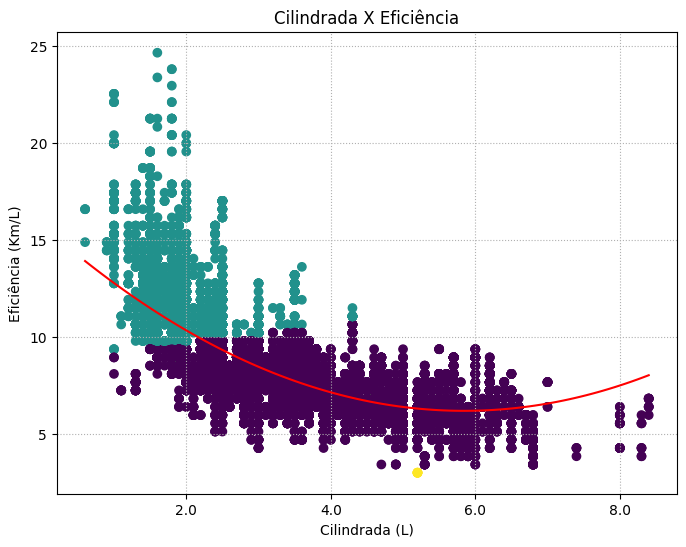

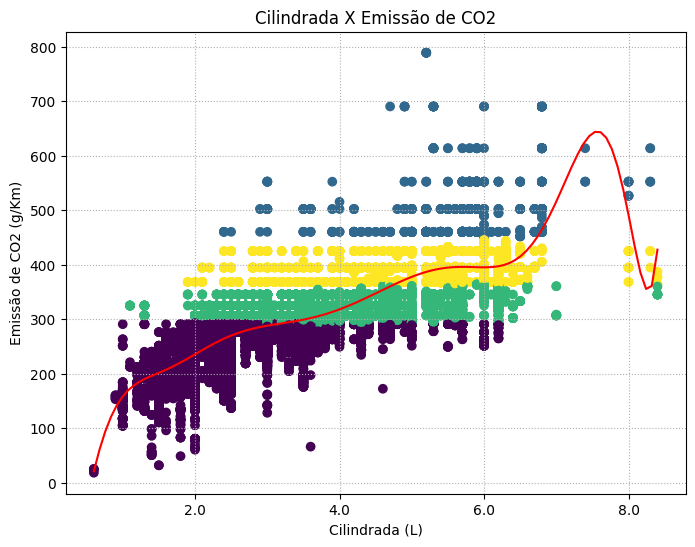

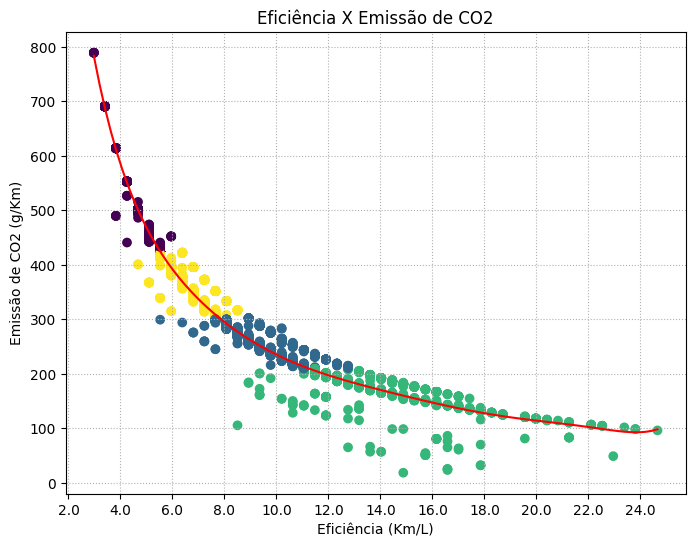

In [ ]:
# PLOTAGEM DOS RESULTADOS EM GRÁFICOS DE DISPERSÃO

# GRAFICO 1 - Cilindrada (L) X Eficiencia (Km/L)

# Obtem termos do polinomio formatados
terms1 = []

for i, coeff in enumerate(polynomial1.coeffs):
    power1 = polynomial1.order - i
    term1 = f"{coeff:.2f}x^{power1}" if power1 > 1 else f"{coeff:.2f}x" if power1 == 1 else f"{coeff:.2f}"
    terms1.append(term1)

# Constroi string da funcao f(x)
function_str1 = "f(x) = " + " + ".join(terms1)

# Plota grafico de dispersao
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(cilindrada, eficiencia, c=predictions1)
ax.set_xlabel("Cilindrada (L)")
ax.set_ylabel("Eficiência (Km/L)")
ax.set_title("Cilindrada X Eficiência")
ax.set_xticks(np.arange(0, np.max(cilindrada) + 2, 2))
ax.set_xticklabels(['%.1f' % x for x in np.arange(0, np.max(cilindrada) + 2, 2)])
ax.grid(linestyle='dotted')

# Plota linha de regressao
x_values = np.linspace(np.min(cilindrada), np.max(cilindrada), 100)
y_values = polynomial1(x_values)
ax.plot(x_values, y_values, color='red')

plt.show()
print() # Imprime linha em branco para separar imagens dos graficos


# GRAFICO 2 - Cilindrada (L) X Emissao de CO2 (g/Km)

# Obtem termos do polinomio formatados
terms2 = []

for i, coeff in enumerate(polynomial2.coeffs):
    power2 = polynomial2.order - i
    term2 = f"{coeff:.2f}x^{power2}" if power2 > 1 else f"{coeff:.2f}x" if power2 == 1 else f"{coeff:.2f}"
    terms2.append(term2)

# Constroi string da funcao f(x)
function_str2 = "f(x) = " + " + ".join(terms2)

# Plota grafico de dispersao
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(cilindrada, co2, c=predictions2)
ax.set_xlabel("Cilindrada (L)")
ax.set_ylabel("Emissão de CO2 (g/Km)")
ax.set_title("Cilindrada X Emissão de CO2")
ax.set_xticks(np.arange(0, np.max(cilindrada) + 2, 2))
ax.set_xticklabels(['%.1f' % x for x in np.arange(0, np.max(cilindrada) + 2, 2)])
ax.grid(linestyle='dotted')

# Plota linha de regressao
x_values = np.linspace(np.min(cilindrada), np.max(cilindrada), 100)
y_values = polynomial2(x_values)
ax.plot(x_values, y_values, color='red')

plt.show()
print() # Imprime linha em branco para separar imagens dos graficos


# GRAFICO 3 - Eficiencia (Km/L) X Emissao de CO2 (g/Km)

# Obtem termos do polinomio formatados
terms3 = []

for i, coeff in enumerate(polynomial3.coeffs):
    power3 = polynomial3.order - i
    term3 = f"{coeff:.2f}x^{power3}" if power3 > 1 else f"{coeff:.2f}x" if power3 == 1 else f"{coeff:.2f}"
    terms3.append(term3)

# Constroi string da funcao f(x)
function_str3 = "f(x) = " + " + ".join(terms3)

# Plota grafico de dispersao
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(eficiencia, co2, c=predictions3)
ax.set_xlabel("Eficiência (Km/L)")
ax.set_ylabel("Emissão de CO2 (g/Km)")
ax.set_title("Eficiência X Emissão de CO2")
ax.set_xticks(np.arange(0, np.max(eficiencia) + 10, 2))
ax.set_xticklabels(['%.1f' % x for x in np.arange(0, np.max(eficiencia) + 10, 2)])
ax.grid(linestyle='dotted')

# Plota linha de regressao
x_values = np.linspace(np.min(eficiencia), np.max(eficiencia), 100)
y_values = polynomial3(x_values)
ax.plot(x_values, y_values, color='red')

plt.show()

In [ ]:
# APRESENTAÇÃO DAS TABELAS COM CLUSTERS

print('\n' + '=' * 70)
print('TABELAS DE AGRUPAMENTO (CLUSTERS)')
print('=' * 70)
print('\n' * 1)

# Tabela Cilindrada (L) vs. Eficiencia (Km/L)
print("Tabela 1. Cilindrada (L) X Eficiência (Km/L)")
print('_' * 70)
print(grouped_table1)
print('_' * 70)
print('\n' * 2)

# Tabela Cilindrada (L) vs. Emissao de CO2 (g/Km)
print("Tabela 2. Cilindrada (L) X Emissão de CO2 (g/Km)")
print('_' * 70)
print(grouped_table2)
print('_' * 70)
print('\n' * 2)

# Tabela Eficiencia (Km/L) X Emissao de CO2 (g/Km)
print("Tabela 3. Eficiência (Km/L) X Emissão de CO2 (g/Km)")
print('_' * 70)
print(grouped_table3)
print('_' * 70)
print('\n')


TABELAS DE AGRUPAMENTO (CLUSTERS)


Tabela 1. Cilindrada (L) X Eficiência (Km/L)
______________________________________________________________________
       Cil. (min)  Cil. (max)  Efic. (min)  Efic. (max)  Elementos
Group                                                             
0             1.0         8.4         3.40        10.63      29491
1             0.6         4.3         9.35        24.66       8471
2             5.2         5.2         2.98         2.98          5
______________________________________________________________________



Tabela 2. Cilindrada (L) X Emissão de CO2 (g/Km)
______________________________________________________________________
       Cil. (min)  Cil. (max)  CO2 (min)  CO2 (max)  Elementos
Group                                                         
0             0.6         6.2      18.02     292.05      21854
1             2.4         8.3     445.52     788.88       1431
2             1.1         8.4     292.67     363.50       8939
3  

In [ ]:
# APRESENTAÇÃO DE PREVISÕES DAS REGRESSÕES

print('\n' + '=' * 70)
print('PREVISÕES DAS REGRESSÕES')
print('=' * 70)
print('\n' * 1)

# Imprime resultados da funcao f(x) para Cilindrada vs. Eficiencia
print('Função polinomial para Cilindrada X Eficiência')
print('_' * 70)
print(function_str1 + '\n')
print("Cilindrada informada:", cilindrada1_info, "L")
print("Eficiência prevista:", previsao_y1, "Km/L")
print('_' * 70)
print('\n' * 1)

# Imprime resultados da funcao f(x) para Cilindrada vs. Emissao de CO2
print('Função polinomial para Cilindrada X Emissão de CO2')
print('_' * 70)
print(function_str2 + '\n')
print("Cilindrada informada:", cilindrada2_info, "L")
print("Emissão de CO2 prevista:", previsao_y2, "g/Km")
print('_' * 70)
print('\n' * 1)

# Imprime resultados da funçao f(x) para Eficiencia X Emissao de CO2
print('Função polinomial para Eficiência X Emissão de CO2')
print('_' * 70)
print(function_str3 + '\n')
print("Eficiência informada:", eficiencia_info, "Km/L")
print("Emissão de CO2 prevista:", previsao_y3, "g/Km")
print('_' * 70)
print('\n' * 1)


PREVISÕES DAS REGRESSÕES


Função polinomial para Cilindrada X Eficiência
______________________________________________________________________
f(x) = 0.28x^2 + -3.29x + 15.77

Cilindrada informada: 1.8 L
Eficiência prevista: 10.77 Km/L
______________________________________________________________________


Função polinomial para Cilindrada X Emissão de CO2
______________________________________________________________________
f(x) = 0.00x^12 + -0.04x^11 + 0.85x^10 + -10.95x^9 + 91.72x^8 + -521.47x^7 + 2043.13x^6 + -5479.47x^5 + 9765.60x^4 + -10856.93x^3 + 6553.44x^2 + -1281.47x + -146.32

Cilindrada informada: 8.2 L
Emissão de CO2 prevista: 368.45 g/Km
______________________________________________________________________


Função polinomial para Eficiência X Emissão de CO2
______________________________________________________________________
f(x) = 0.00x^8 + -0.00x^7 + 0.01x^6 + -0.29x^5 + 4.75x^4 + -49.50x^3 + 321.70x^2 + -1253.16x + 2655.20

Eficiência informada: 15.0 Km/L
Emis

> ## RESULTADOS DOS TREINAMENTOS COM AJUSTES DE PARÂMETROS NUMÉRICOS  
> <p align='justify'>Destacaram-se na cor <font color="aqua">azul</font> os parâmetros ajustados em cada execução a seguir descrita, em que também se mantém o ajuste anterior e acrescenta-se nova alteração para observar os resultados apresentados depois do treinamento do modelo.</p>

><b>1a. execução (com a configuração inicial do código)</b>  
> Parâmetros:  
> - num_neur_rnc1 = 4; num_neur_rnc2 = 8; num_neur_rnc3 = 4  
> - epocas_rnc1 = 10; epocas_rnc2 = 1; epocas_rnc3 = 1  
> - taxa_aprend_rnc1 = 0.01; taxa_aprend_rnc2 = 2.00; taxa_aprend_rnc3 = 1.00  
> - ordem_pol1 = 1; ordem_pol2 = 10; ordem_pol3 = 6</br>  
> <img src='https://i.postimg.cc/C59wS9nd/1exe-rnc-som2.png' widht=1024></br>  
> </br>

> <b>2a. execução (alterados números de neurônios)</b>  
> Parâmetros:
> - <font color="aqua">num_neur_rnc1 = 4; num_neur_rnc2 = 4; num_neur_rnc3 = 4</font>  
> - epocas_rnc1 = 10; epocas_rnc2 = 1; epocas_rnc3 = 1  
> - taxa_aprend_rnc1 = 0.01; taxa_aprend_rnc2 = 2.00; taxa_aprend_rnc3 = 1.00  
> - ordem_pol1 = 1; ordem_pol2 = 10; ordem_pol3 = 6</br>  
> <img src='https://i.postimg.cc/7ZS9w7JN/2exe-rnc-som2.png'></br>
> <br/>

> <b>3a. execução (alteradas as quantidades de épocas de aprendizado)</b>  
> Parâmetros:
> - num_neur_rnc1 = 4; num_neur_rnc2 = 4; num_neur_rnc3 = 4  
> - <font color="aqua">epocas_rnc1 = 20; epocas_rnc2 = 2; epocas_rnc3 = 2</font>  
> - taxa_aprend_rnc1 = 0.01; taxa_aprend_rnc2 = 2.00; taxa_aprend_rnc3 = 1.00  
> - ordem_pol1 = 1; ordem_pol2 = 10; ordem_pol3 = 6</br>
> </br>
> <img src='https://i.postimg.cc/gkq3YB9t/3exe-rnc-som2.png'></br>
> </br>

> <b>4a. execução (alterados o número de neurônios da rnc1 e taxa de aprendizado)</b>  
> Parâmetros:
> -  <font color="aqua">num_neur_rnc1 = 3; num_neur_rnc2 = 4; num_neur_rnc3 = 4</font>
> - epocas_rnc1 = 20; epocas_rnc2 = 2; epocas_rnc3 = 2  
> - <font color="aqua">taxa_aprend_rnc1 = 0.005; taxa_aprend_rnc2 = 1.00; taxa_aprend_rnc3 = 0.50</font>
> - ordem_pol1 = 1; ordem_pol2 = 10; ordem_pol3 = 6</br>
> </br>
> <img src='https://i.postimg.cc/CM2VzptP/4exe-rnc-som2.png'></br>
> </br>

> <b>5a. execução (alterada ordem de polinômios)</b></br>
> Parâmetros:
> - num_neur_rnc1 = 3; num_neur_rnc2 = 4; num_neur_rnc3 = 4
> - epocas_rnc1 = 20; epocas_rnc2 = 2; epocas_rnc3 = 2  
> - taxa_aprend_rnc1 = 0.005; taxa_aprend_rnc2 = 1.00; taxa_aprend_rnc3 = 0.50
> - <font color="aqua">ordem_pol1 = 2; ordem_pol2 = 12; ordem_pol3 = 8</font></br>
> </br>
> <img src='https://i.postimg.cc/vmB7htp3/5exe-rnc-som2.png'>

